### Classification (Logistic Regression)
<hr>

#### Question 1
#### Suppose we collect data for a group of students in a statistics class with variables $X_1$=hours studied, $X_2$= undergrad GPA, and $Y$ = receive an A. We fit a logistic regression and produce estimated coefficient, $\hat{\beta}_0$ = −6, $\hat{\beta}_1$ = 0.05, $\hat{\beta}_2$ = 1.
#### a) Estimate the probability that a student who studies for 40h and has an undergrad GPA of 3.5, gets an A in the class.


In [1]:
b0 = -6
b1 = 0.05
b2 = 1
hours = 40
gpa = 3.5
y <- b0 + b1 * hours + b2 * gpa
p <- exp(y) / (1 + exp(y))
p

[1] 0.3775407

#### Answer: 
Probability = 0.3775

#### b) How many hours would the student in part (a) need to study to have a 50% chance of getting an A in the class?

In [2]:
p <- 0.5
y <- log((p / (1 - p)), base = exp(1))
hours <- (y - b0 - (b2 * gpa)) / b1 
hours

[1] 50

#### Answer:
50 hours

#### Question 2 
#### This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.
#### a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?


In [3]:
library(ISLR)
data(Weekly)
head(Weekly)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


In [4]:
str(Weekly)

'data.frame':	1089 obs. of  9 variables:
 $ Year     : num  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ Lag1     : num  0.816 -0.27 -2.576 3.514 0.712 ...
 $ Lag2     : num  1.572 0.816 -0.27 -2.576 3.514 ...
 $ Lag3     : num  -3.936 1.572 0.816 -0.27 -2.576 ...
 $ Lag4     : num  -0.229 -3.936 1.572 0.816 -0.27 ...
 $ Lag5     : num  -3.484 -0.229 -3.936 1.572 0.816 ...
 $ Volume   : num  0.155 0.149 0.16 0.162 0.154 ...
 $ Today    : num  -0.27 -2.576 3.514 0.712 1.178 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 1 1 2 2 2 1 2 2 2 1 ...


In [5]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

#### Answer:
The weekly dataset has 9 columns, of which 8 are numeric (Col 1 represents year, Col 2 - 6 represents percentage return from previous x numbers of days where x belongs to [1,5], Col 7 represents volume of stock traded, Col 8 represents percentage return today) and remaining is categorical (Col 9 - Direction of stock market).
Weekly data set summary shows nearly similar ranges for Lag1, Lag2, Lag3, Lag4, Lag5. The dataset includes data from 1990 to 2010. <br>

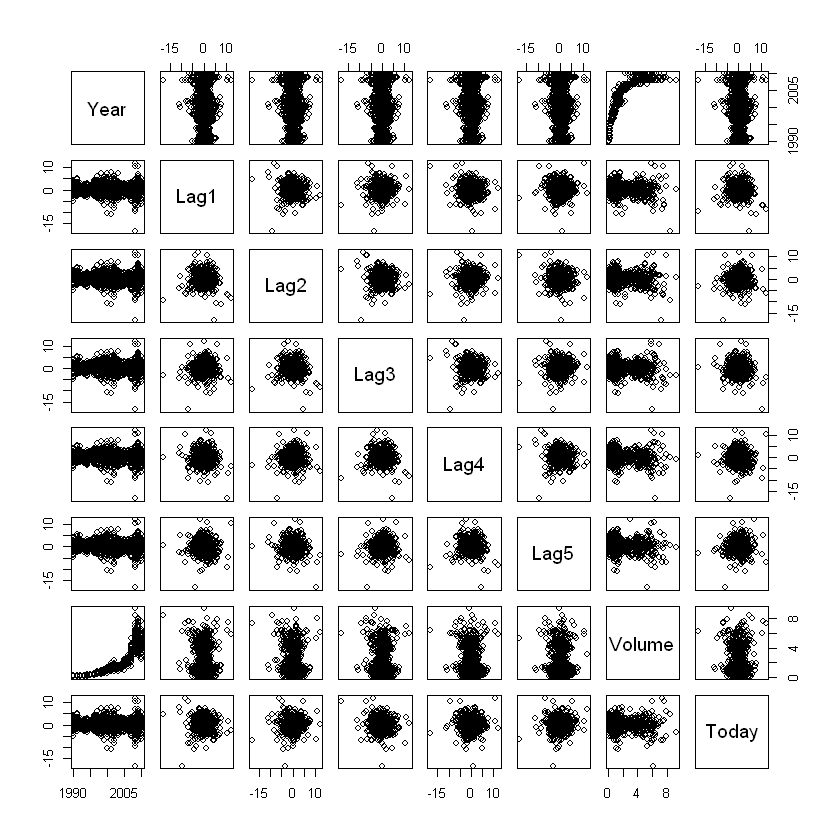

In [6]:
pairs(Weekly[,-9])

In [7]:
cor(Weekly[,-9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


#### Answer:
There seems to be some relationship between Volume and Year, but it is definitely not linear. The correlation between other variables seem to be low, especially between the days - this shows the stock market can be random. <br>

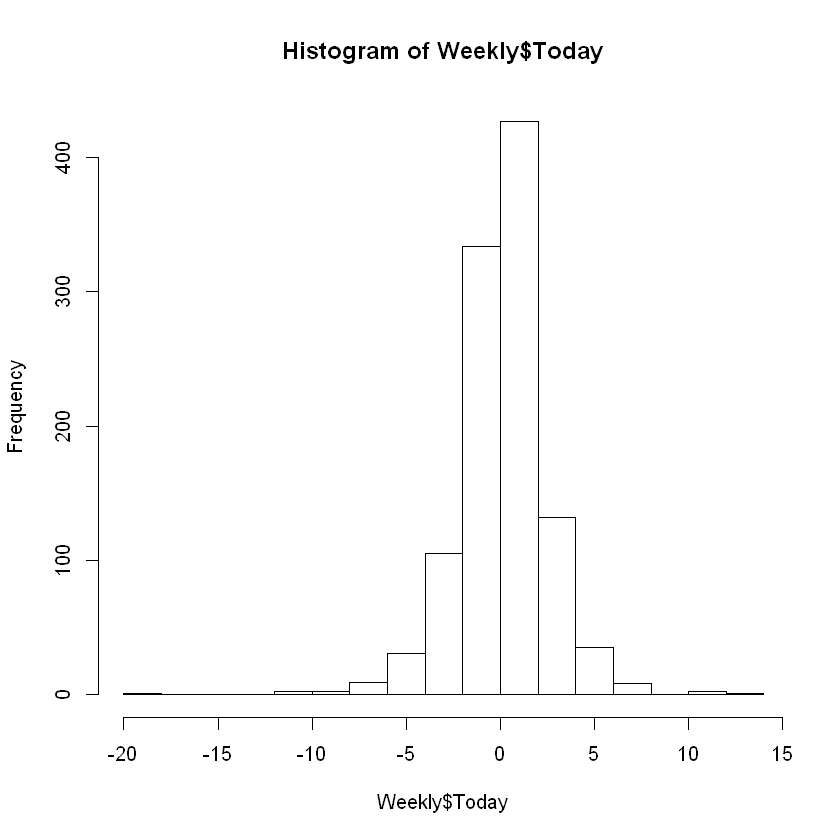

In [8]:
hist(Weekly$Today)

#### Answer:
The distribution of percentages returns for each day (today) follows a near normal distribution. 

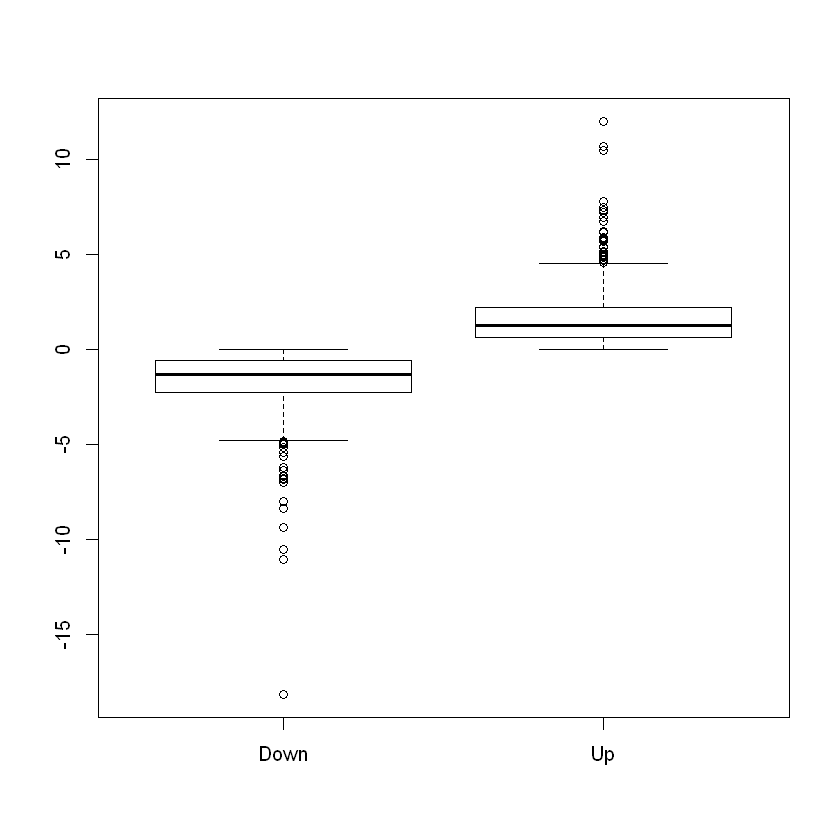

In [9]:
boxplot(Weekly$Today ~ Weekly$Direction)

#### Answer:
As expected, the boxplot shows that today's return is likely to much less if stock market is going down. <br> 


#### b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?


In [10]:
logistic_model <- glm(Direction~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume,data=Weekly,family="binomial")
summary(logistic_model)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = "binomial", data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


#### Answer:
Lag2 seems to be a significant predictor at $\alpha$ = 0.01

#### c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [11]:
glm_prob <- predict(logistic_model, type="response")
glm_pred <- rep("Down", length(glm_prob))
glm_pred[glm_prob > 0.5] = "Up"
confusion_matrix <- table(Weekly$Direction, glm_pred)
confusion_matrix

      glm_pred
       Down  Up
  Down   54 430
  Up     48 557

In [12]:
accuracy_rate <- (confusion_matrix["Up", "Up"] + confusion_matrix["Down", "Down"]) / sum(confusion_matrix)
accuracy_rate
mean(glm_pred == Weekly$Direction) == accuracy_rate
error_rate <- 1 - accuracy_rate
error_rate

[1] 0.5610652

[1] TRUE

[1] 0.4389348

In [13]:
TP_rate <- confusion_matrix["Up", "Up"] / (confusion_matrix["Up", "Up"] + confusion_matrix["Up", "Down"]) 
FP_rate <- confusion_matrix["Down", "Up"] / (confusion_matrix["Down", "Up"] + confusion_matrix["Down", "Down"])
TN_rate <- confusion_matrix["Down","Down"] / (confusion_matrix["Down", "Down"] + confusion_matrix["Down", "Up"])
FN_rate <- confusion_matrix["Up","Down"] / (confusion_matrix["Up", "Up"] + confusion_matrix["Up", "Down"]) 
data.frame(True_Positive_Rate = TP_rate, False_Positive_Rate = FP_rate)
data.frame(True_Negative_Rate = TN_rate, False_Negative_Rate = FN_rate)

True_Positive_Rate,False_Positive_Rate
0.9206612,0.8884298


True_Negative_Rate,False_Negative_Rate
0.1115702,0.07933884


#### Answer:
From the confusion matrix, we can calculate the accuracy rate (proportion of events identified correctly = 0.5611) and the error rate (proportion of events identified incorrectly = 0.4389). <br>
However, confusion matrix is really useful to calculate the true positive/ negative (e.g. the prediction is stock market goes up, when it indeed goes up) and false positive / negative errors (the prediction is stock market goes up, when it goes down - false positive). 


#### d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [14]:
cond = Weekly$Year <= 2008
training_set <- Weekly[cond,]
test_set <- Weekly[!cond,]
summary(training_set$Year)
summary(test_set$Year)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1990    1994    1999    1999    2004    2008 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2009    2009    2010    2010    2010    2010 

In [15]:
updated_model <- glm(Direction ~ Lag2, data=Weekly, family="binomial", subset = cond )
summary(updated_model)


Call:
glm(formula = Direction ~ Lag2, family = "binomial", data = Weekly, 
    subset = cond)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


In [16]:
test_set <- Weekly[Weekly$Year > 2008,]
glm_prob <- predict(updated_model, newdata=test_set, type="response")
glm_pred <- rep("Down", length(glm_prob))
glm_pred[glm_prob > 0.5] = "Up"
new_confusion_matrix <- table(test_set$Direction, glm_pred)
new_confusion_matrix

      glm_pred
       Down Up
  Down    9 34
  Up      5 56

In [17]:
accuracy_rate <-  (new_confusion_matrix["Down","Down"] + new_confusion_matrix["Up", "Up"]) / sum(new_confusion_matrix)
accuracy_rate
accuracy_rate == mean(glm_pred == test_set$Direction)

[1] 0.625

[1] TRUE

#### Answer: 
Accuracy rate = 0.625